In [ ]:
import numpy as np
import pandas as pd


In [ ]:
data=pd.read_csv('/content/ET_pupil_clip_2.csv')

In [ ]:
data.head()

,time_s,diameter,normalized_diameter
0,0.000000,92.562576,-0.352706
1,0.030528,92.486251,-0.429032
2,0.061056,92.433100,-0.482183
3,0.091584,92.433100,-0.482183
4,0.122112,92.433100,-0.482183


In [ ]:
average=data[data["time_s"]<1]['diameter'].mean()

**2.** **New normalised vector was created**

In [ ]:
data['normalized_diameter']=data['diameter']-average

0      -0.352706
1      -0.429032
2      -0.482183
3      -0.482183
4      -0.482183
          ...   
1852    9.007161
1853    9.090758
1854    9.198916
1855    9.319228
1856    9.441473
Name: normalized_diameter, Length: 1857, dtype: float64

In [ ]:
print(data)

         time_s    diameter  normalized_diameter
0      0.000000   92.562576            -0.352706
1      0.030528   92.486251            -0.429032
2      0.061056   92.433100            -0.482183
3      0.091584   92.433100            -0.482183
4      0.122112   92.433100            -0.482183
...         ...         ...                  ...
1852  56.537969  101.922443             9.007161
1853  56.568497  102.006041             9.090758
1854  56.599025  102.114198             9.198916
1855  56.629553  102.234511             9.319228
1856  56.660081  102.356756             9.441473

[1857 rows x 3 columns]


In [29]:
Diameter=pd.DataFrame(data['diameter'])
Time=pd.DataFrame(data['time_s'])

In [ ]:
import matplotlib.pyplot as plt

**3.Visualization of the normalized and non-normalized data**

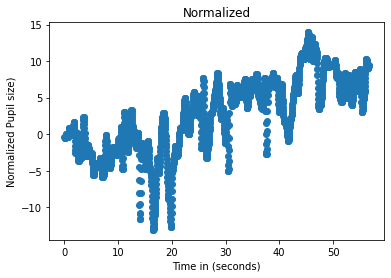

In [ ]:
plt.scatter(Time,data['normalized_diameter'])
plt.title("Normalized")
plt.xlabel("Time in (seconds)")
plt.ylabel("Normalized Pupil size)")
plt.show()

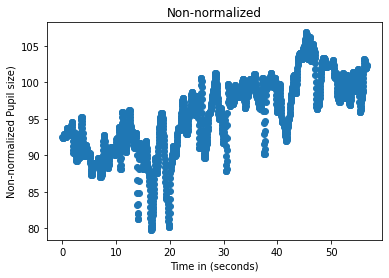

In [ ]:
plt.scatter(Time,Diameter)
plt.title("Non-normalized")
plt.xlabel("Time in (seconds)")
plt.ylabel("Non-normalized Pupil size)")
plt.show()

**4. Calculation and report following from 5 second intervals after the baseline period**

In [ ]:
def dia_five_range(data):
    # end of time
    end = 6.0

    # ranges
    ranges = np.arange(1, data['time_s'].max(), 5)

    # empty list to hold averages
    avgs_list = []

    # Looping function
    for index in ranges:
        slice = data[(data['time_s'] > index) & (data['time_s'] < end)]
        slice_diam_avg = slice['normalized_diameter'].mean()
        avgs_list.append(slice_diam_avg)
        end += 5.0
    
    return avgs_list

In [ ]:
diameter_averages = dia_five_range(data)
diameter_averages


[-1.7474655010846438,
 -2.817776431206595,
 -1.5358377766334244,
 -4.979216339421843,
 2.396895602878771,
 2.371612813793405,
 5.902894389769014,
 5.137403438000722,
 7.237224641130304,
 8.934324841598283,
 6.304148219647063,
 9.468170220606044]

In [ ]:
time_interval= np.arange(1, data['time_s'].max(), 5)

In [ ]:
def dia_five_range(data):
    # end of time
    end = 6.0

    # ranges
    ranges = np.arange(1, data['time_s'].max(), 5)

    # empty list to hold averages
    variance = []

    # Looping function
    for index in ranges:
        slice = data[(data['time_s'] > index) & (data['time_s'] < end)]
        slice_diam_variance = slice['normalized_diameter'].var()
        variance.append(slice_diam_variance)
        end += 5.0
    
    return variance

In [ ]:
diameter_variance = dia_five_range(data)
diameter_variance

[4.030044634541476,
 2.6504949194863854,
 9.02474348347106,
 21.424362600340462,
 6.0584531704178355,
 11.335274655648842,
 1.5138918644027883,
 5.924468989556536,
 20.377842498091937,
 5.711179426262708,
 2.409172966492748,
 0.30934564258007624]

**5. Bar chart visualization of the result**

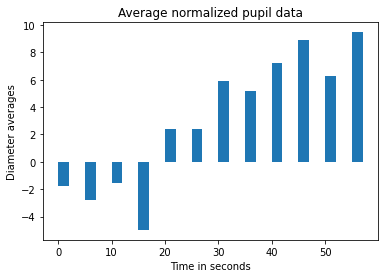

In [30]:
#Average pupil size
plt.bar(time_interval,diameter_averages,width=2)
 
plt.xlabel("Time in seconds")
plt.ylabel("Diameter averages")
plt.title("Average normalized pupil data")
plt.show()

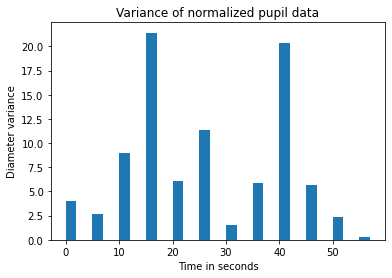

In [ ]:
#Standard deviation of the pupil size
plt.bar(time_interval,diameter_variance,width=2)
plt.xlabel("Time in seconds")
plt.ylabel("Diameter variance")
plt.title("Variance of normalized pupil data")
plt.show()